In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Optional
import yaml
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from torchvision.transforms import v2 as T # type: ignore
#from torchvision.models import resnet18, ResNet18_Weights
from geovision.config.basemodels import ExperimentConfig # noqa
from geovision.data.module import ImageDatasetDataModule
from geovision.io.local import get_new_dir
from geovision.analysis.viz import plot_batch
#from geovision.training.module import ClassificationModule

transforms: dict[str, T.Transform | None] = {
    "image_transform": None,
    "target_transform": None,
    "common_transform": None,
}

config = ExperimentConfig.from_config_file("config.yaml", transforms)
datamodule = ImageDatasetDataModule(config)
#classifier = ClassificationModule(
    #config = config, 
    #model = resnet18(num_classes = config.dataset.num_classes)
#)
datamodule.setup("validate")
ds = datamodule.val_dataset
dl = datamodule.val_dataloader()

testing train dataloader: 100%|██████████| 427/427 [00:39<00:00, 10.77it/s]


train image batch shape: torch.Size([22, 3, 224, 224])
train label batch shape: torch.Size([22])


testing val dataloader: 100%|██████████| 61/61 [00:05<00:00, 11.63it/s]


val image batch shape: torch.Size([22, 3, 224, 224])
val label batch shape: torch.Size([22])


testing test dataloader: 100%|██████████| 122/122 [00:11<00:00, 10.98it/s]


test image batch shape: torch.Size([22, 3, 224, 224])
test label batch shape: torch.Size([22])


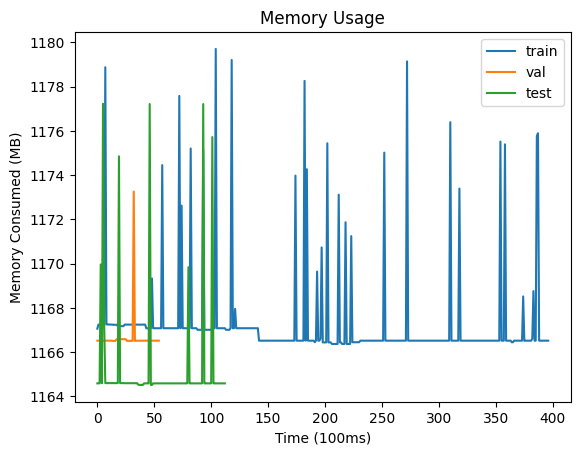

In [20]:
from geovision.data.module import test_datamodule
test_datamodule(datamodule)

918.2421875

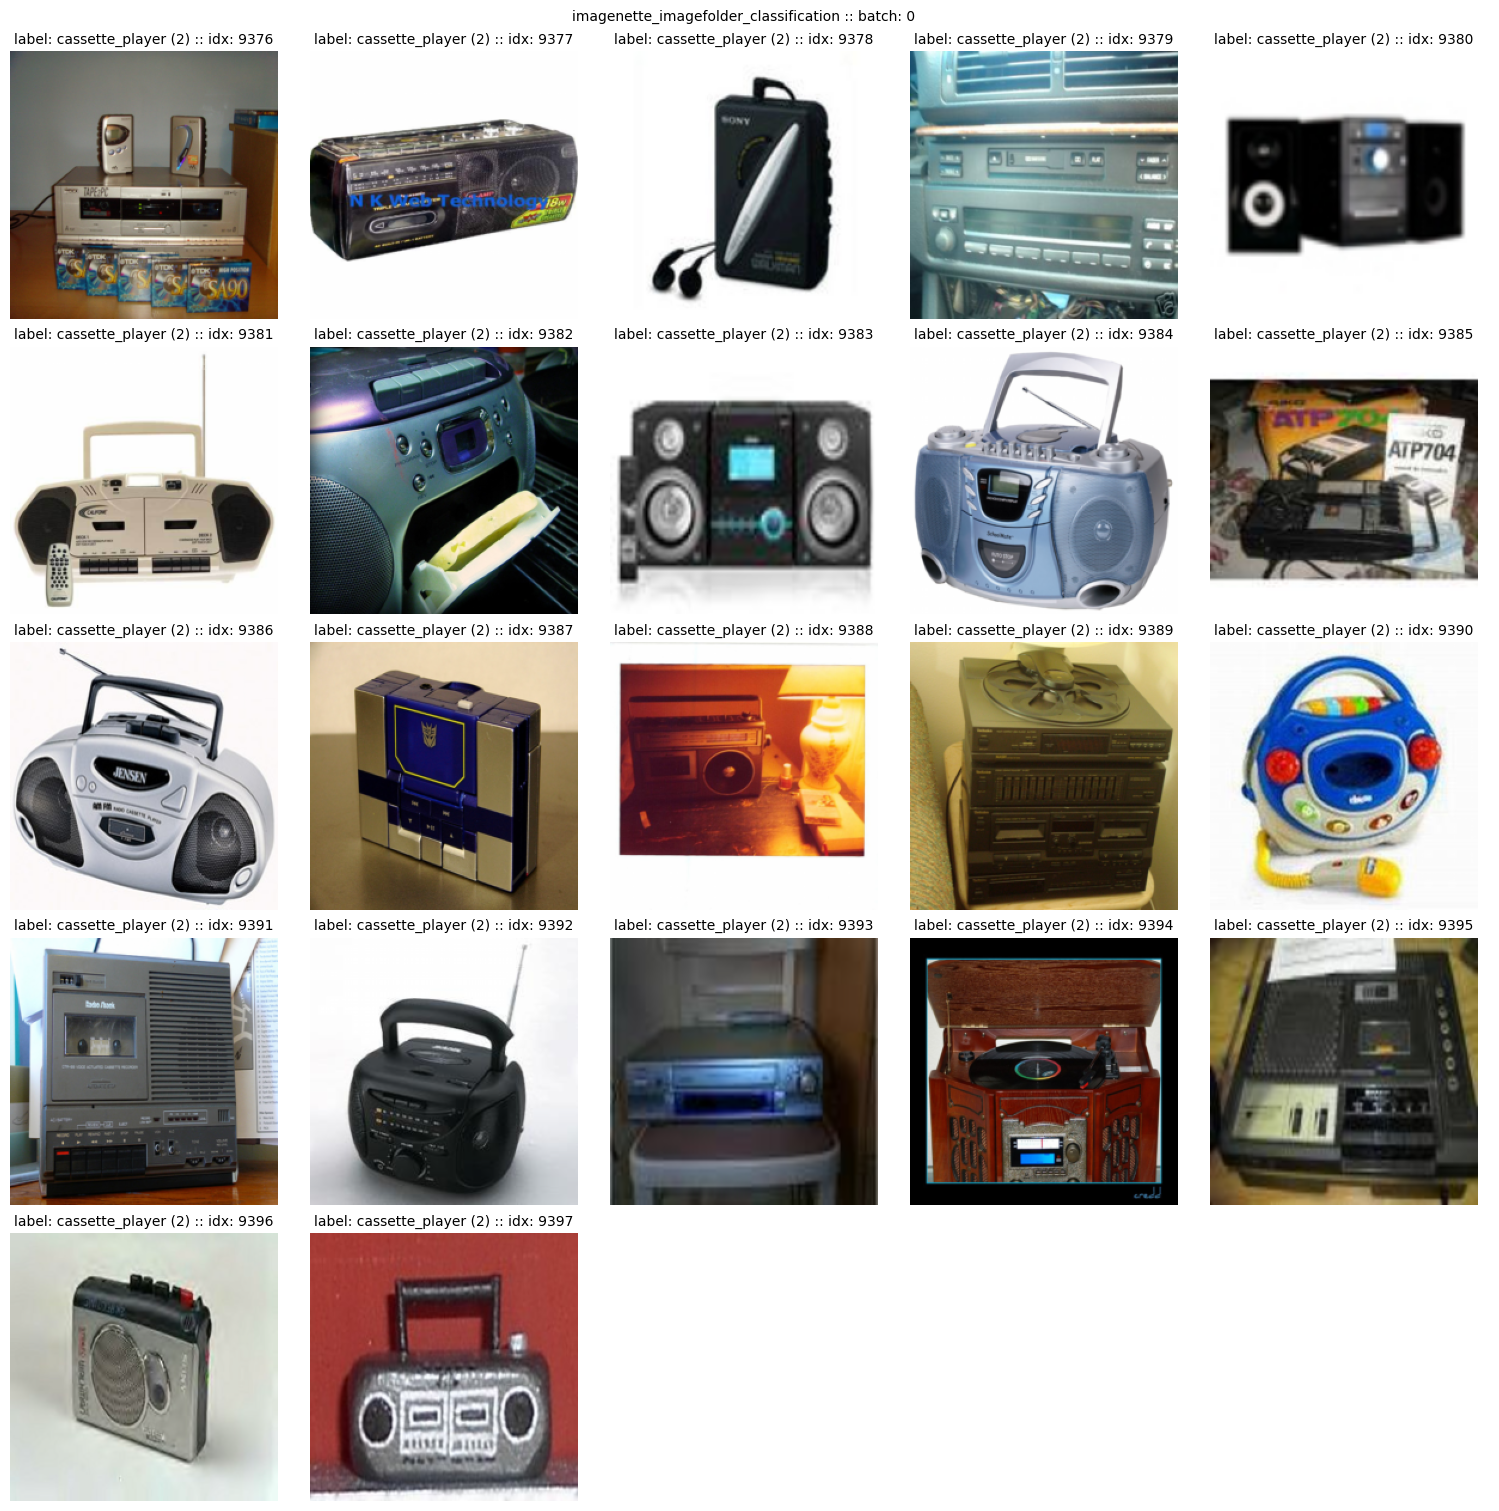

In [3]:
from memory_profiler import memory_usage
from geovision.analysis.viz import plot_batch
mem = memory_usage((plot_batch, (ds, next(iter(dl)), 0)),)